In [82]:
# 포폴에도 Seaborn 쓴거 있어야 해요
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
school_df = pd.read_csv("../../Data/study/2007~2022유치원_대학_사설학원.csv",index_col=0)
school_df.head()

,시점,지역,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자
0,2007,경기도,15591,61,489548,951908,411732,135245,485552
1,2007,서울특별시,11549,50,375937,665227,355193,82461,541288
2,2007,경상남도,5844,19,138629,264776,137276,44188,139584
3,2007,부산광역시,4779,22,144991,242193,106501,37921,265238
4,2007,대구광역시,2929,11,113962,199471,105396,27908,124318


In [3]:
el_school = pd.read_excel("../../Data/study/초등학교수.xlsx")
el_school.drop(columns="설립주체별(1)",inplace=True)

In [4]:
el_school.rename(columns={"시도별(1)":"시도"},inplace=True)

In [5]:
el_school = el_school.iloc[1:,:]
el_school

,시도,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,서울,597,599,599,601,603,603,607,607,607,609
2,부산,302,305,306,308,308,305,304,304,304,304
3,대구,219,220,221,225,228,229,229,230,232,233
4,인천,240,242,243,247,249,249,250,253,258,260
5,광주,149,150,153,153,154,154,155,155,155,155
6,대전,143,143,146,146,147,148,148,148,148,149
7,울산,118,119,119,117,118,117,119,120,121,121
8,세종,22,26,35,37,43,47,48,49,51,52
9,경기,1187,1195,1213,1227,1241,1261,1277,1298,1317,1320
10,강원,351,351,351,351,351,351,349,347,348,349


In [6]:
el_school.set_index("시도",inplace=True)

In [7]:
el_school_T = el_school.T

In [8]:
el_school_T

시도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2013,597,302,219,240,149,143,118,22,1187,351,259,406,414,426,477,493,110
2014,599,305,220,242,150,143,119,26,1195,351,259,405,414,424,478,493,111
2015,599,306,221,243,153,146,119,35,1213,351,260,405,415,426,476,498,112
2016,601,308,225,247,153,146,117,37,1227,351,260,405,416,427,469,500,112
2017,603,308,228,249,154,147,118,43,1241,351,259,407,419,430,468,503,112
2018,603,305,229,249,154,148,117,47,1261,351,258,409,419,429,470,502,113
2019,607,304,229,250,155,148,119,48,1277,349,259,409,419,429,471,501,113
2020,607,304,230,253,155,148,120,49,1298,347,258,410,421,429,473,505,113
2021,607,304,232,258,155,148,121,51,1317,348,259,412,420,430,473,509,113
2022,609,304,233,260,155,149,121,52,1320,349,256,411,421,426,473,510,114


In [9]:
el_school_T.astype(int).info()
el_school_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2013 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울      10 non-null     int64
 1   부산      10 non-null     int64
 2   대구      10 non-null     int64
 3   인천      10 non-null     int64
 4   광주      10 non-null     int64
 5   대전      10 non-null     int64
 6   울산      10 non-null     int64
 7   세종      10 non-null     int64
 8   경기      10 non-null     int64
 9   강원      10 non-null     int64
 10  충북      10 non-null     int64
 11  충남      10 non-null     int64
 12  전북      10 non-null     int64
 13  전남      10 non-null     int64
 14  경북      10 non-null     int64
 15  경남      10 non-null     int64
 16  제주      10 non-null     int64
dtypes: int64(17)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2013 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   서울      10 n

In [10]:
el_school_T.rename(columns={"경기":"경기도","서울":"서울특별시","경남":"경상남도","인천":"인천광역시","부산":"부산광역시","경북":"경상북도",
	"대구":"대구광역시","충남":"충청남도","전북":"전라북도","전남":"전라남도","광주":"광주광역시","충북":"충청북도","대전":"대전광역시",
	"강원":"강원도","울산":"울산광역시","제주":"제주특별자치도","세종":"세종특별자치시"},inplace=True)


In [11]:
el_school_T.iloc[0,:]

시도
서울특별시       597
부산광역시       302
대구광역시       219
인천광역시       240
광주광역시       149
대전광역시       143
울산광역시       118
세종특별자치시      22
경기도        1187
강원도         351
충청북도        259
충청남도        406
전라북도        414
전라남도        426
경상북도        477
경상남도        493
제주특별자치도     110
Name: 2013, dtype: object

In [12]:
test = [] # (10, 17) 년도,지방
sid = []
sido = []
num = 0
tom = 0
for t in range(10): # 17번 년도 넣는걸껄
    for _ in range(17): # 10번
        test.append(el_school_T.index[num])
    num+=1

for t in range(17): # 17번 # 지방 수 만큼
    sid.append(el_school_T.columns[t])
sido.append(sid *10) # 전국 시군구를 2000~2022에 맞춰 23번 곱해 리스트를 만듦.
years = []
f = 0
for _ in range(10):
        for k in range(17):
            years.append(el_school_T.iloc[0,:][k]) # 지역별 값
        f+=1

In [13]:
# row수 확인.
print(len(test))
print(len(sido[0]))
print(len(years))

170
170
170


In [14]:
elementarySchool_SU = pd.DataFrame(
    {'시점':test,
    '지역':sido[0],
    '초등학교수':years
    }
)
elementarySchool_SU

,시점,지역,초등학교수
0,2013,서울특별시,597
1,2013,부산광역시,302
2,2013,대구광역시,219
3,2013,인천광역시,240
4,2013,광주광역시,149
...,...,...,...
165,2022,전라북도,414
166,2022,전라남도,426
167,2022,경상북도,477
168,2022,경상남도,493


In [15]:
elementarySchool_SU.시점 = elementarySchool_SU.시점.astype(int)

In [16]:
from sklearn.cluster import KMeans

In [17]:
school_df = school_df[(school_df["시점"]>2012) & (school_df['시점']<2021)]
school_df.shape

(136, 9)

In [18]:
elementarySchool_SU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      170 non-null    int64 
 1   지역      170 non-null    object
 2   초등학교수   170 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [19]:
elementarySchool_SU = elementarySchool_SU[elementarySchool_SU['시점']<2021]

In [20]:
school_plus = pd.merge(school_df,elementarySchool_SU,on=["시점","지역"])
school_plus

,시점,지역,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자,초등학교수
0,2013,경기도,18134,62,458220,739619,460580,182231,499221,1187
1,2013,서울특별시,13405,48,304251,469392,334123,92400,570583,597
2,2013,경상남도,5662,20,124566,190166,122060,50370,129823,493
3,2013,부산광역시,4638,22,110454,160821,105310,44217,274955,302
4,2013,대구광역시,3639,11,94394,136309,103666,34550,130792,219
...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,2232,17,41458,85135,42488,16049,116655,259
132,2020,대전광역시,2198,15,40694,79807,41549,22132,134526,143
133,2020,강원도,2179,17,37836,73478,39806,14679,116054,351
134,2020,제주특별자치도,1051,4,19468,40575,18679,6395,28773,110


In [21]:
school_plus.iloc[:,2:].corr()

,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자,초등학교수
사설학원수,1.000000,0.901238,0.971377,0.988100,0.969813,0.964451,0.869340,0.888759
대학교_숫자,0.901238,1.000000,0.885426,0.889439,0.882348,0.864227,0.916069,0.920337
중학생인원수변화,0.971377,0.885426,1.000000,0.987687,0.993720,0.973822,0.854043,0.890087
초등학생인원수변화,0.988100,0.889439,0.987687,1.000000,0.982548,0.986260,0.842367,0.903489
고등학생인원수변화,0.969813,0.882348,0.993720,0.982548,1.000000,0.968456,0.861917,0.878891
유치원원아수변화,0.964451,0.864227,0.973822,0.986260,0.968456,1.000000,0.791135,0.900971
대학생숫자,0.869340,0.916069,0.854043,0.842367,0.861917,0.791135,1.000000,0.757488
초등학교수,0.888759,0.920337,0.890087,0.903489,0.878891,0.900971,0.757488,1.000000


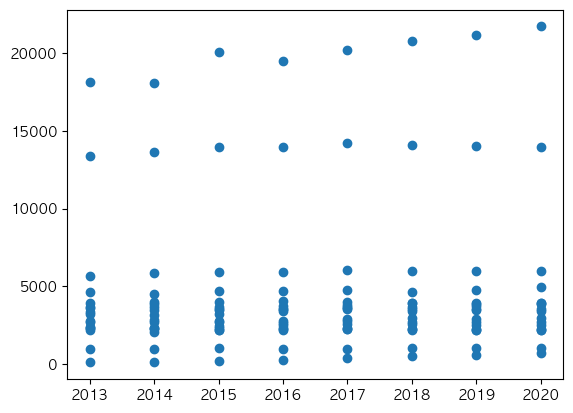

In [22]:
plt.scatter(school_plus.iloc[:,0],school_plus.iloc[:,2])
# 치환중요도

In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [24]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = school_plus[['초등학교수', '사설학원수']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

9


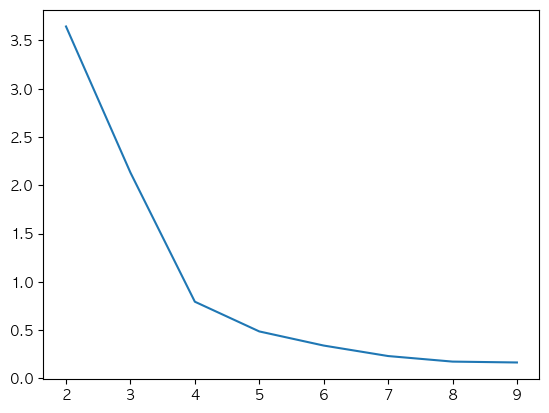

In [139]:
scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(data_scale)
    scores.append(km.inertia_)
print(k)
plt.plot(range(2,10),scores)
plt.show()

In [150]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)
print(k)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
school_plus['cluster'] = model.fit_predict(data_scale)

4


In [135]:
school_plus.cluster.unique()

array([1, 3, 0, 2], dtype=int32)

In [145]:
school_plus.loc[:,"사설학원수":"초등학교수"].corr()

,사설학원수,대학교_숫자,중학생인원수변화,초등학생인원수변화,고등학생인원수변화,유치원원아수변화,대학생숫자,초등학교수
사설학원수,1.000000,0.901238,0.971377,0.988100,0.969813,0.964451,0.869340,0.888759
대학교_숫자,0.901238,1.000000,0.885426,0.889439,0.882348,0.864227,0.916069,0.920337
중학생인원수변화,0.971377,0.885426,1.000000,0.987687,0.993720,0.973822,0.854043,0.890087
초등학생인원수변화,0.988100,0.889439,0.987687,1.000000,0.982548,0.986260,0.842367,0.903489
고등학생인원수변화,0.969813,0.882348,0.993720,0.982548,1.000000,0.968456,0.861917,0.878891
유치원원아수변화,0.964451,0.864227,0.973822,0.986260,0.968456,1.000000,0.791135,0.900971
대학생숫자,0.869340,0.916069,0.854043,0.842367,0.861917,0.791135,1.000000,0.757488
초등학교수,0.888759,0.920337,0.890087,0.903489,0.878891,0.900971,0.757488,1.000000


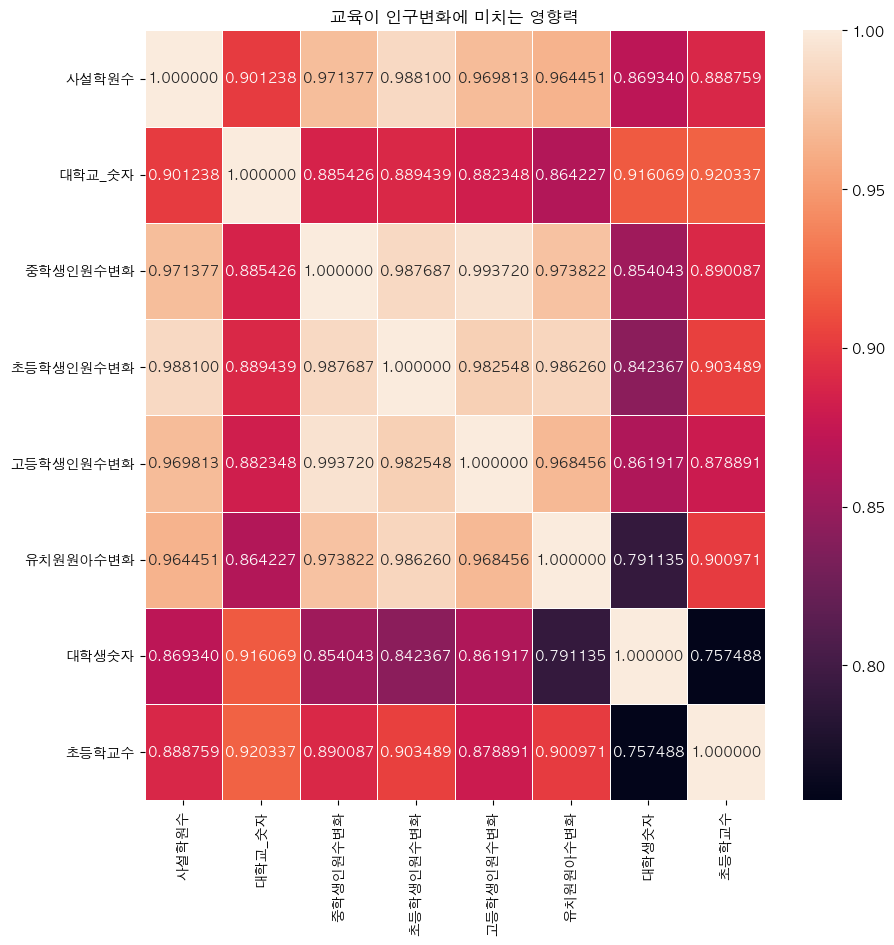

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(
    school_plus.loc[:,"사설학원수":"초등학교수"].corr(),
    annot= True,
    fmt= 'f',
    linewidths= 0.5,

)
plt.title("교육이 인구변화에 미치는 영향력")
plt.show()

4


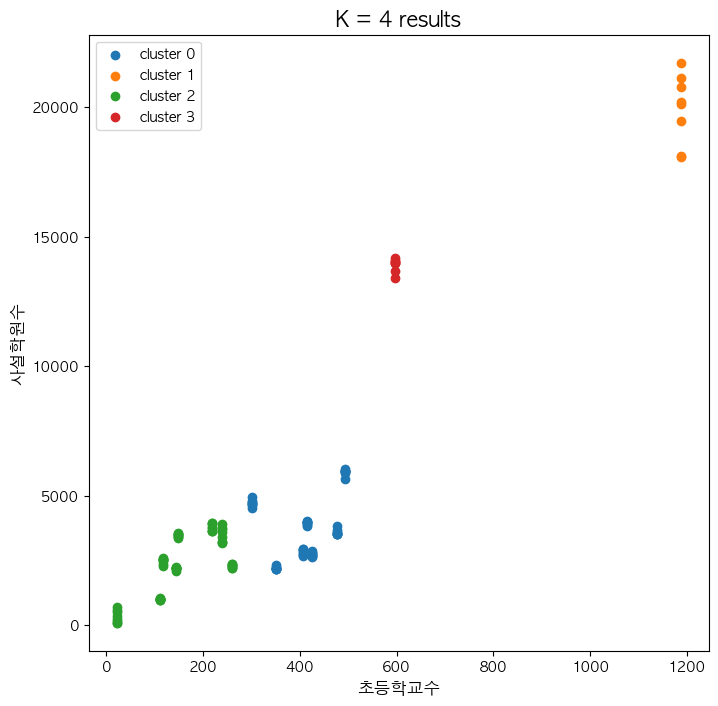

In [257]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(school_plus.loc[school_plus['cluster'] == i, '초등학교수'], school_plus.loc[school_plus['cluster'] == i, '사설학원수'], 
                label = 'cluster ' + str(i))
print(k)
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('초등학교수', size = 12)
plt.ylabel('사설학원수', size = 12)
plt.show()

In [27]:
school_plus[school_plus['시점']==2013].시점

0     2013
1     2013
2     2013
3     2013
4     2013
5     2013
6     2013
7     2013
8     2013
9     2013
10    2013
11    2013
12    2013
13    2013
14    2013
15    2013
16    2013
Name: 시점, dtype: int64

---
### 의미있을것이라 예측되는 초등학교수와 사설학원수 분포도 확인

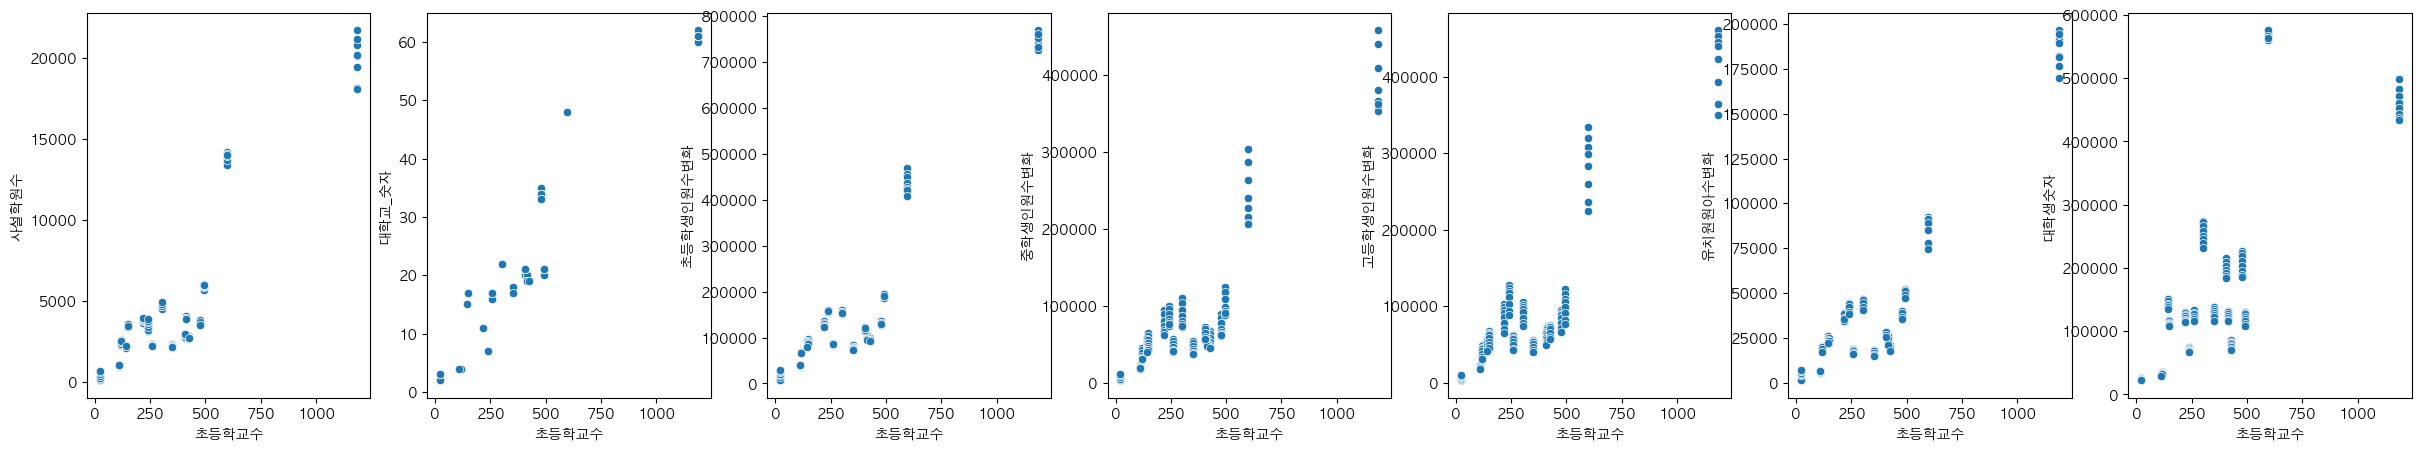

In [251]:
# plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=7,figsize=(30,5))
sns.scatterplot("초등학교수", "사설학원수", data=school_plus, ax=ax[0])
sns.scatterplot("초등학교수", "대학교_숫자", data=school_plus, ax=ax[1])
sns.scatterplot("초등학교수", "초등학생인원수변화", data=school_plus, ax=ax[2])
sns.scatterplot("초등학교수", "중학생인원수변화", data=school_plus, ax=ax[3])
sns.scatterplot("초등학교수", "고등학생인원수변화", data=school_plus, ax=ax[4])
sns.scatterplot("초등학교수", "유치원원아수변화", data=school_plus, ax=ax[5])
sns.scatterplot("초등학교수", "대학생숫자", data=school_plus, ax=ax[6])
plt.show()

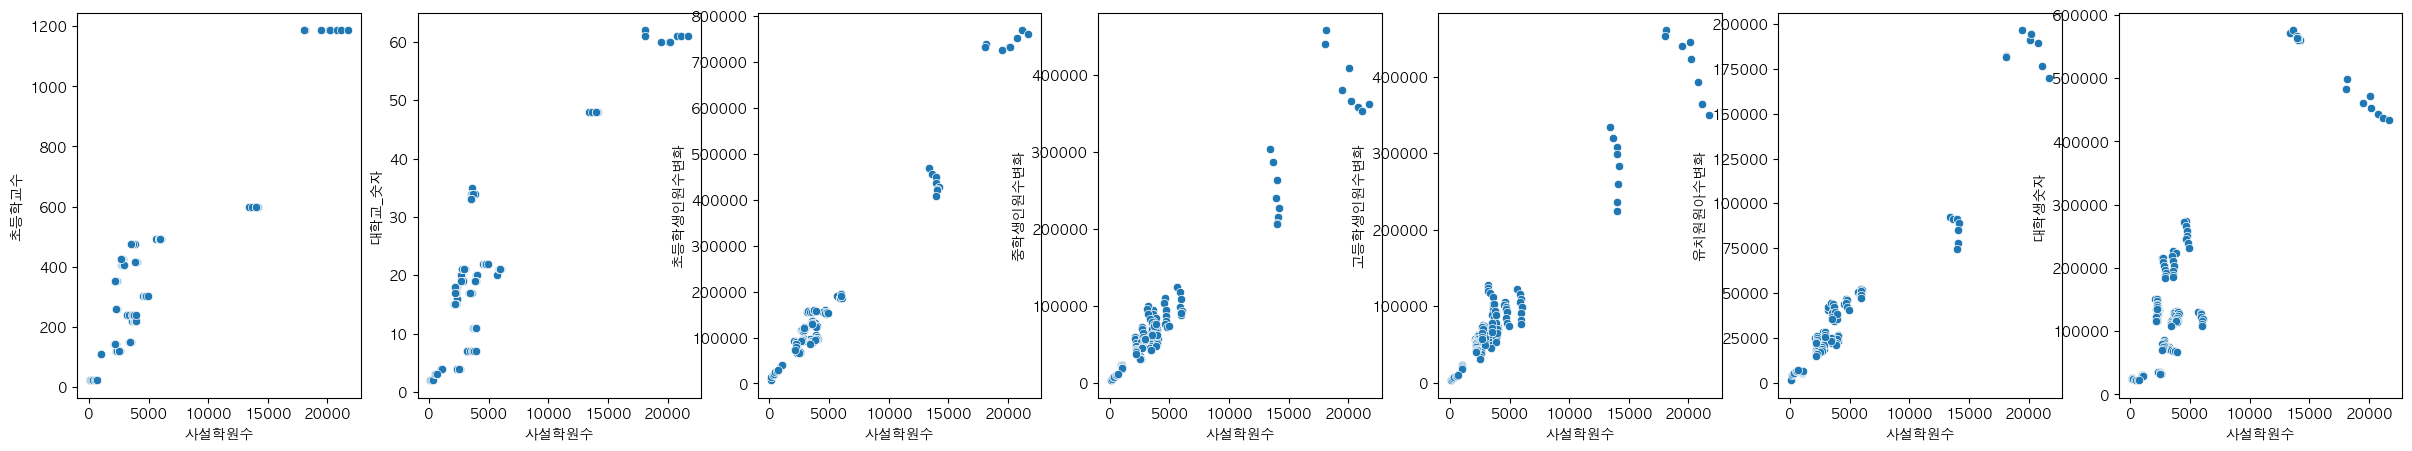

In [252]:
# plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=7,figsize=(30,5))
sns.scatterplot("사설학원수", "초등학교수", data=school_plus, ax=ax[0])
sns.scatterplot("사설학원수", "대학교_숫자", data=school_plus, ax=ax[1])
sns.scatterplot("사설학원수", "초등학생인원수변화", data=school_plus, ax=ax[2])
sns.scatterplot("사설학원수", "중학생인원수변화", data=school_plus, ax=ax[3])
sns.scatterplot("사설학원수", "고등학생인원수변화", data=school_plus, ax=ax[4])
sns.scatterplot("사설학원수", "유치원원아수변화", data=school_plus, ax=ax[5])
sns.scatterplot("사설학원수", "대학생숫자", data=school_plus, ax=ax[6])
plt.show()

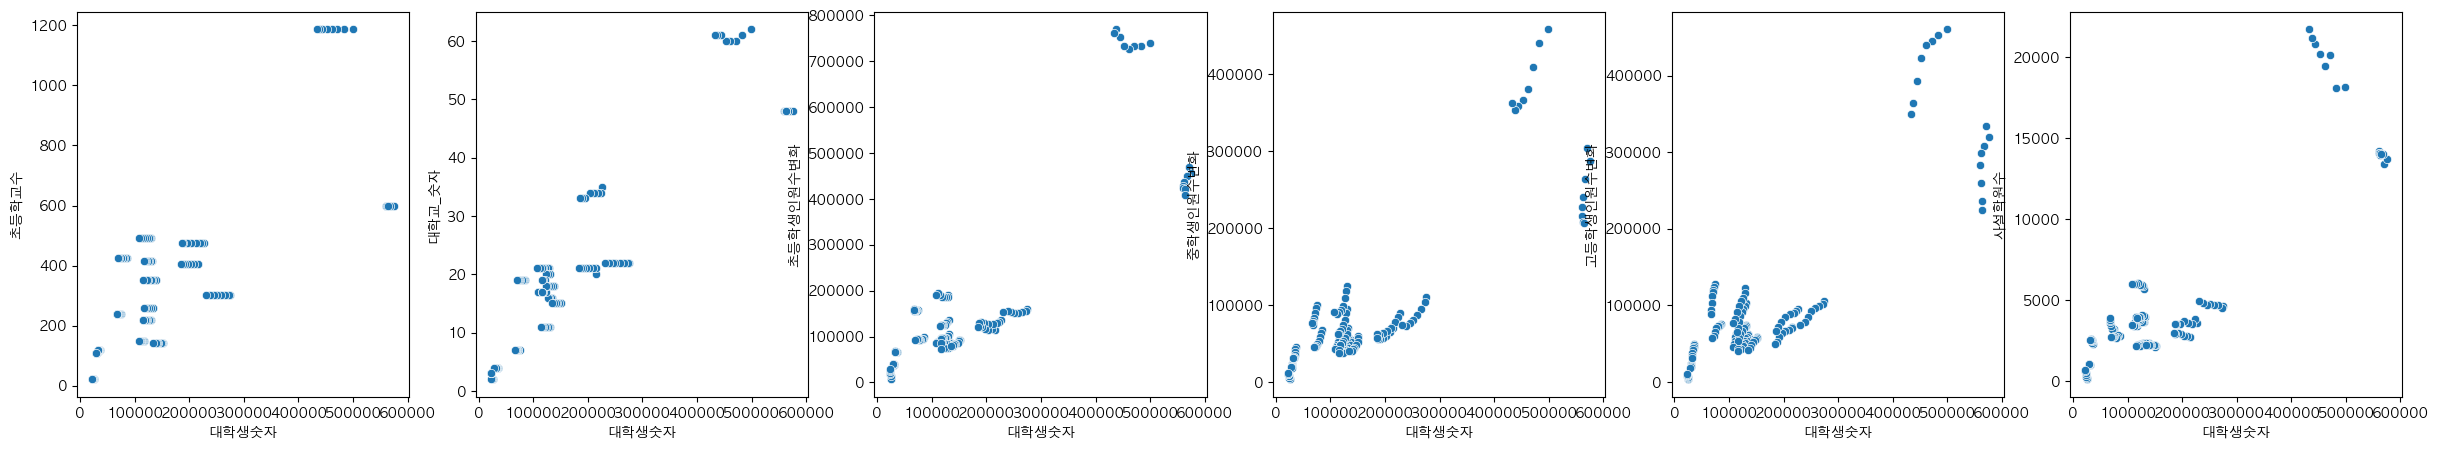

In [253]:
# plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=6,figsize=(30,5))
sns.scatterplot("대학생숫자", "초등학교수", data=school_plus, ax=ax[0])
sns.scatterplot("대학생숫자", "대학교_숫자", data=school_plus, ax=ax[1])
sns.scatterplot("대학생숫자", "초등학생인원수변화", data=school_plus, ax=ax[2])
sns.scatterplot("대학생숫자", "중학생인원수변화", data=school_plus, ax=ax[3])
sns.scatterplot("대학생숫자", "고등학생인원수변화", data=school_plus, ax=ax[4])
sns.scatterplot("대학생숫자", "사설학원수", data=school_plus, ax=ax[5])
plt.show()

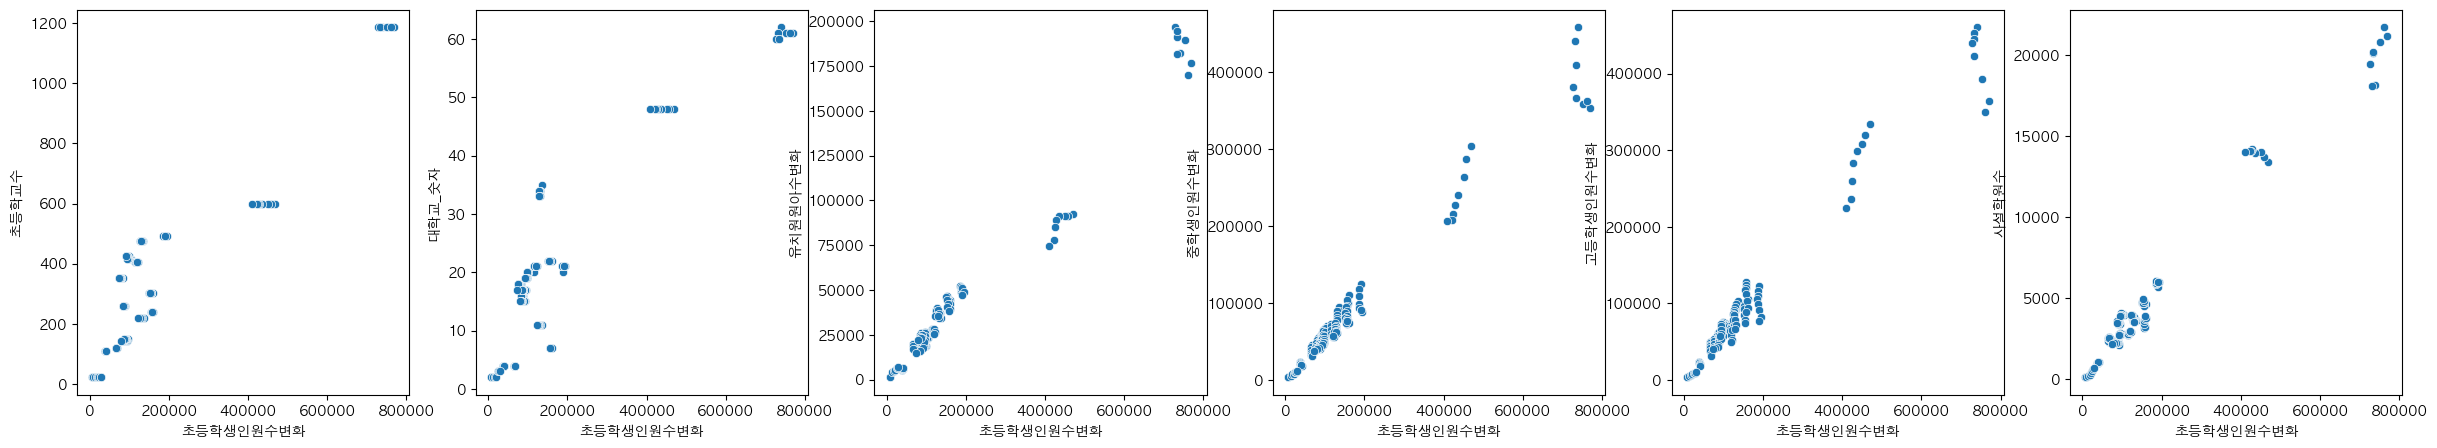

In [254]:
# plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=6,figsize=(30,5))
sns.scatterplot("초등학생인원수변화", "초등학교수", data=school_plus, ax=ax[0])
sns.scatterplot("초등학생인원수변화", "대학교_숫자", data=school_plus, ax=ax[1])
sns.scatterplot("초등학생인원수변화", "유치원원아수변화", data=school_plus, ax=ax[2])
sns.scatterplot("초등학생인원수변화", "중학생인원수변화", data=school_plus, ax=ax[3])
sns.scatterplot("초등학생인원수변화", "고등학생인원수변화", data=school_plus, ax=ax[4])
sns.scatterplot("초등학생인원수변화", "사설학원수", data=school_plus, ax=ax[5])
plt.show()

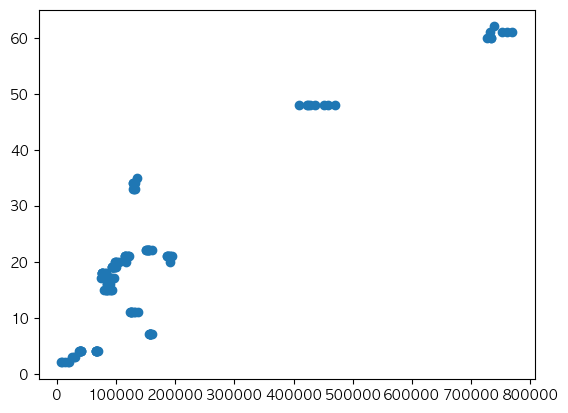

In [247]:
plt.scatter(school_plus.초등학생인원수변화,school_plus.대학교_숫자)

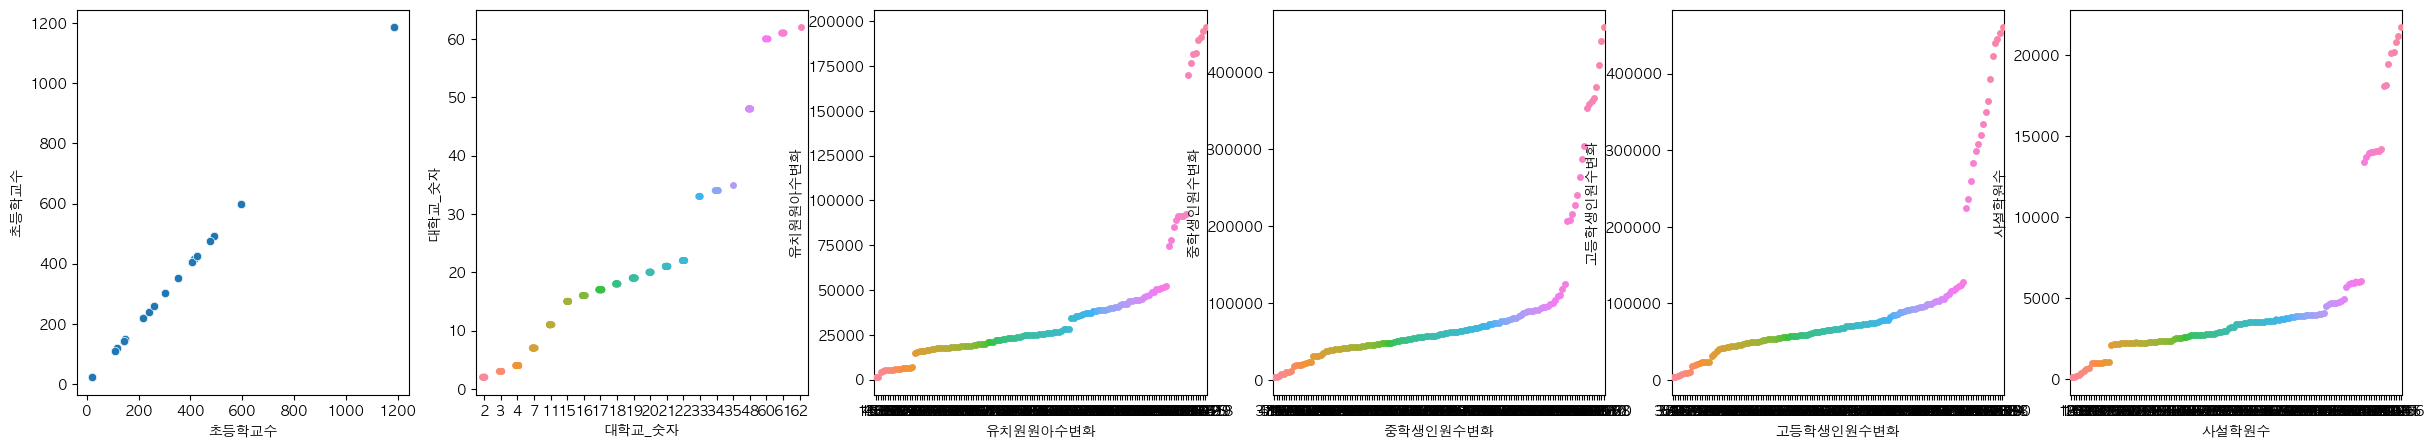

In [245]:
# plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=6,figsize=(30,5))
sns.scatterplot("초등학교수", "초등학교수", data=school_plus, ax=ax[0])
sns.stripplot("대학교_숫자", "대학교_숫자", data=school_plus, ax=ax[1])
sns.stripplot("유치원원아수변화", "유치원원아수변화", data=school_plus, ax=ax[2])
sns.stripplot("중학생인원수변화", "중학생인원수변화", data=school_plus, ax=ax[3])
sns.stripplot("고등학생인원수변화", "고등학생인원수변화", data=school_plus, ax=ax[4])
sns.stripplot("사설학원수", "사설학원수", data=school_plus, ax=ax[5])
plt.show()

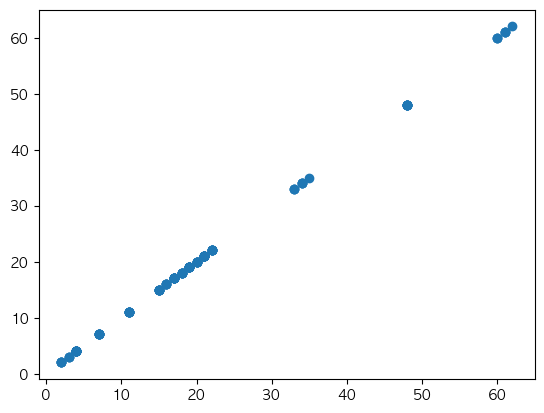

In [246]:
plt.scatter(school_plus.대학교_숫자,school_plus.대학교_숫자)

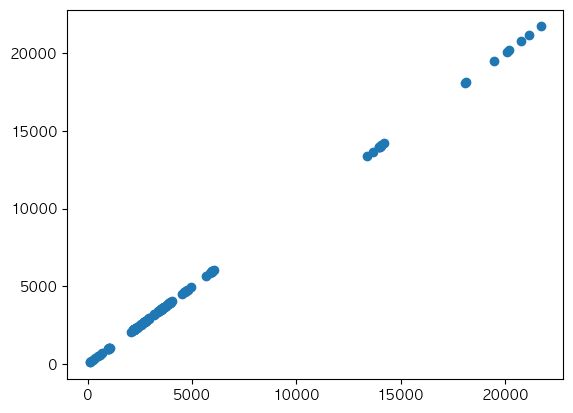

In [244]:
plt.scatter(school_plus.사설학원수,school_plus.사설학원수)

In [235]:
# 머신러닝 모듈
# sklearn의 preprocessing기능을 사용하면 최대값과 최소값을 비교하면서 정규화가 진행된다
from sklearn import preprocessing

# 최대값과 최소값 가져오기 instance
min_max_scaler = preprocessing.MinMaxScaler()

In [236]:
x = school_plus[["초등학교수","초등학생인원수변화"]].values

In [237]:
x_scaler= min_max_scaler.fit_transform(x.astype(float))
x_scaler
## array([0~1 사이 숫자])

array([[1.        , 0.96049978],
       [0.49356223, 0.60617528],
       [0.40429185, 0.24005119],
       [0.24034335, 0.20157371],
       [0.16909871, 0.16943332],
       [0.18712446, 0.19776727],
       [0.33648069, 0.12855764],
       [0.39055794, 0.1680277 ],
       [0.10901288, 0.11665185],
       [0.32961373, 0.14308717],
       [0.34678112, 0.12078347],
       [0.08240343, 0.07875918],
       [0.20343348, 0.10721769],
       [0.10386266, 0.11316796],
       [0.28240343, 0.09977919],
       [0.07553648, 0.04083765],
       [0.        , 0.        ],
       [1.        , 0.95091221],
       [0.49356223, 0.59060465],
       [0.40429185, 0.23586449],
       [0.24034335, 0.19492981],
       [0.16909871, 0.16347518],
       [0.18712446, 0.19622266],
       [0.33648069, 0.12426343],
       [0.39055794, 0.16287465],
       [0.10901288, 0.11285983],
       [0.32961373, 0.14156616],
       [0.34678112, 0.11621259],
       [0.08240343, 0.07699429],
       [0.20343348, 0.10413372],
       [0.

In [238]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
study_df = pd.DataFrame(x_scaler, columns=[["초등학교수","초등학생인원수변화"]], index=school_plus.index)
study_df

,초등학교수,초등학생인원수변화
0,1.000000,0.960500
1,0.493562,0.606175
2,0.404292,0.240051
3,0.240343,0.201574
4,0.169099,0.169433
...,...,...
131,0.203433,0.102333
132,0.103863,0.095347
133,0.282403,0.087049
134,0.075536,0.043906


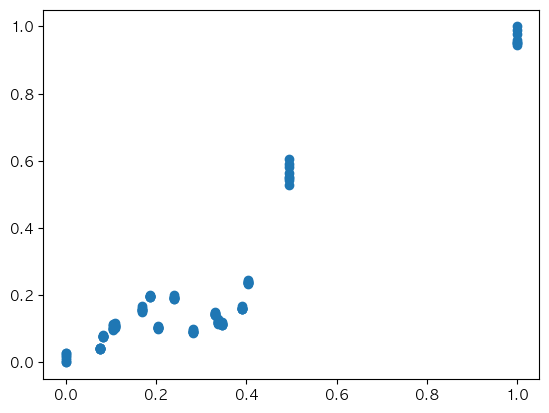

In [239]:
plt.scatter(study_df.초등학교수,study_df.초등학생인원수변화)

In [ ]:
> 정규화 했는데 차트 차이가 읎네;;

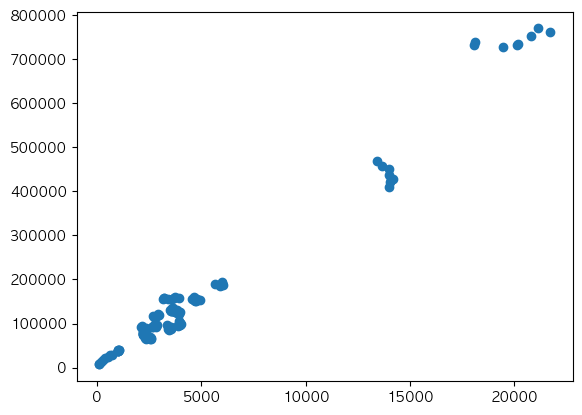

In [243]:
# plt.title("사설한원과 초등학교수 산포도")
# plt.scatter(school_plus.사설학원수,school_plus.초등학교수)
plt.scatter(school_plus.사설학원수,school_plus.초등학생인원수변화)
# plt.scatter(school_plus.초등학생인원수변화,school_plus.초등학교수)
# plt.scatter(school_plus.중학생인원수변화	,school_plus.초등학교수)
# plt.scatter(school_plus.고등학생인원수변화,school_plus.초등학교수)
# plt.scatter(school_plus.유치원원아수변화,school_plus.초등학교수)

plt.show()

In [152]:
school_plus.columns.unique()

Index(['시점', '지역', '사설학원수', '대학교_숫자', '중학생인원수변화', '초등학생인원수변화', '고등학생인원수변화',
       '유치원원아수변화', '대학생숫자', '초등학교수', 'cluster'],
      dtype='object')

In [153]:
school_plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시점         136 non-null    int64 
 1   지역         136 non-null    object
 2   사설학원수      136 non-null    int64 
 3   대학교_숫자     136 non-null    int64 
 4   중학생인원수변화   136 non-null    int64 
 5   초등학생인원수변화  136 non-null    int64 
 6   고등학생인원수변화  136 non-null    int64 
 7   유치원원아수변화   136 non-null    int64 
 8   대학생숫자      136 non-null    int64 
 9   초등학교수      136 non-null    int64 
 10  cluster    136 non-null    int32 
dtypes: int32(1), int64(9), object(1)
memory usage: 12.2+ KB


---
### 로지스틱 회귀로 클러스터 값 예측률 찍어보자

In [197]:
# Feature
study_input = school_plus[['초등학교수','사설학원수','초등학생인원수변화']].to_numpy()
study_input[:5]

array([[  1187,  18134, 739619],
       [   597,  13405, 469392],
       [   493,   5662, 190166],
       [   302,   4638, 160821],
       [   219,   3639, 136309]])

In [198]:
# Target
study_target = school_plus['cluster'].to_numpy()
study_target

array([1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 3, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 3, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 3, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 3, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 2], dtype=int32)

In [199]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(study_input,study_target,random_state=42)

# 표준화 

In [200]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

---
### KNN을 이용한 확률 예측

In [201]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_scaled,train_target)
print("Train Score : ", knn.score(train_scaled,train_target))
print("Test Score : ", knn.score(test_scaled,test_target))

Train Score :  1.0
Test Score :  1.0


In [202]:
# test의 확률예측 값보기
import numpy as np
proba = knn.predict_proba(test_scaled[:5])
np.round(proba,decimals=4) # 소수점 이하 4자리

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

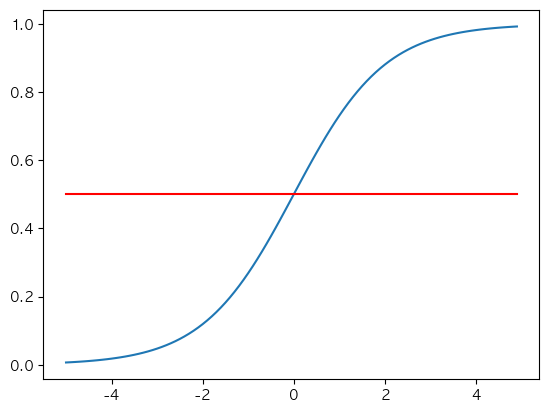

In [203]:
# Sigmoid Graph 출력해 보기
import matplotlib.pyplot as plt

z=np.arange(-5,5,0.1)
y=np.full((100,1),0.5) # 양성과 음성의 기준점
phi=1/(1+np.exp(-z))

plt.plot(z,phi)
plt.plot(z,y,c='red')

plt.show()

---
### 로지스틱 회귀로 다중 분류 수행하기

In [204]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print("Train :", lr.score(train_scaled,train_target))
print("Test :", lr.score(test_scaled,test_target))

Train : 1.0
Test : 1.0


---
### 확률 분포 검증

In [205]:
# test data로 확률
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.074, 0.   , 0.924, 0.002],
       [0.   , 0.   , 1.   , 0.   ],
       [0.997, 0.   , 0.003, 0.   ],
       [0.001, 0.   , 0.999, 0.   ],
       [0.997, 0.   , 0.003, 0.   ]])

In [206]:
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions, decimals=2)

array([[  3.24,  -8.7 ,   5.77,  -0.31],
       [  2.28, -12.18,  11.71,  -1.81],
       [  7.4 ,  -7.54,   1.61,  -1.47],
       [  2.43, -10.92,   9.37,  -0.88],
       [  7.31,  -7.39,   1.4 ,  -1.32]])

In [207]:
from scipy.special import softmax
proba = softmax(decisions, axis=1)
np.round(proba, decimals=3)

array([[0.074, 0.   , 0.924, 0.002],
       [0.   , 0.   , 1.   , 0.   ],
       [0.997, 0.   , 0.003, 0.   ],
       [0.001, 0.   , 0.999, 0.   ],
       [0.997, 0.   , 0.003, 0.   ]])

In [208]:
test_target[:5]

array([2, 2, 0, 2, 0], dtype=int32)

In [209]:
lr.classes_

array([0, 1, 2, 3], dtype=int32)